In [1]:
#Eliminating warnings from scikit-learn 
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
%matplotlib inline
import numpy as np
import time
import matplotlib.pyplot as plt
from IPython import display

### Generate some dots

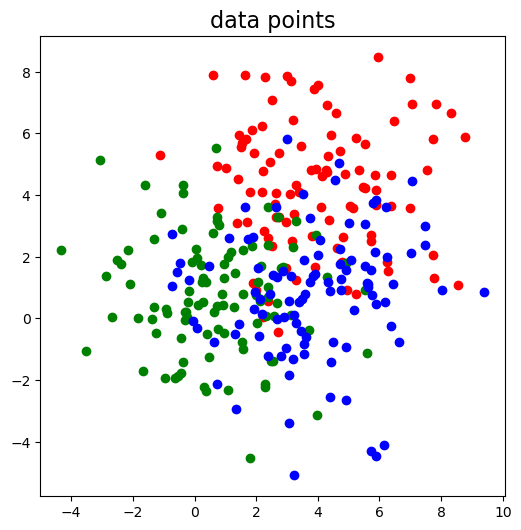

In [3]:
#%% create a random number generator
rng = np.random.RandomState(0)
#%% generate some data samples (three groups) in 2D space
#group1: M data samples
M=100
sigma=2 # try 0.5 (isolated clusters) and 2 (overlapping clusters)
X1 = sigma*rng.randn(M,2)
X1 += [4, 4] #center of group1
#group2: M data samples
X2 = sigma*rng.randn(M,2)
X2 += [1, 1] #center of group2
#group3: M data samples
X3 = sigma*rng.randn(M,2)
X3 += [4, 1] #center of group3
#put data in one 2D array
X = np.concatenate([X1, X2, X3], axis=0)
#
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(X1[:,0], X1[:,1], 'ro')
ax.plot(X2[:,0], X2[:,1], 'go')
ax.plot(X3[:,0], X3[:,1], 'bo')
ax.set_aspect('equal')
ax.set_title('data points', fontsize=16)
plt.draw()

in this example, we know the 'ground-truth' cluster labels because we generated the data<br>
in general, we do not have the 'ground-truth' cluster labels

### Step-1:  set the number of clusters and randomly initialize the centers

Text(0.5, 1.0, 'Initialization')

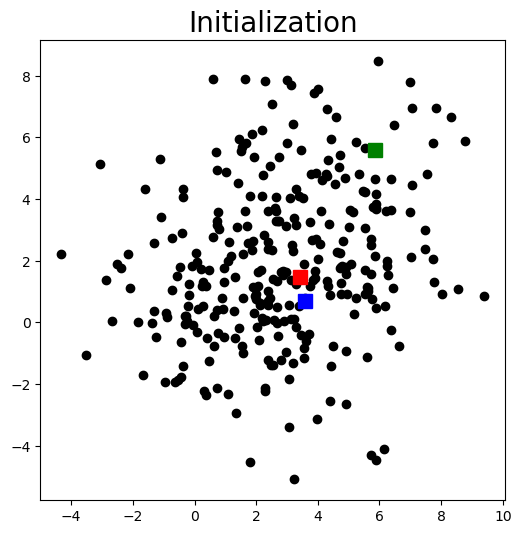

In [4]:
K = 3 # the number of centers
C_init = 6*rng.rand(K,2) # centers in the current iteration
#show initial centers and data
#
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(X[:,0], X[:,1], 'ko')
s=['rs', 'bs', 'gs']
for k in range(0, K):
    ax.plot(C_init[k,0], C_init[k,1], s[k], markersize=10)
ax.set_aspect('equal')
ax.set_title('Initialization', fontsize=20)

### Update the centers and the assignment (cluster lables of data points) in a loop

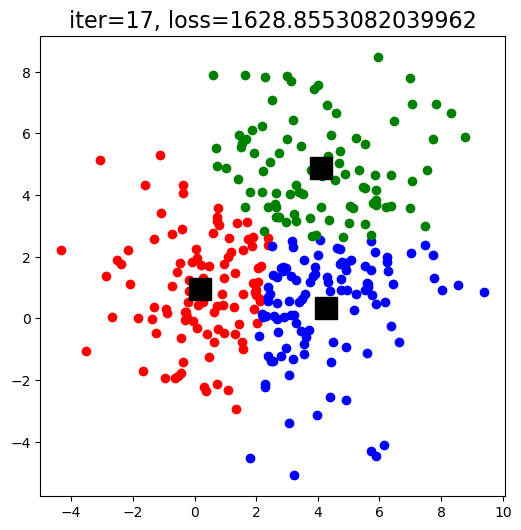

<Figure size 640x480 with 0 Axes>

In [5]:
C = C_init.copy()
C_old = C_init.copy()
tic = time.time() # time recorder
loss_list=[]
fig, ax = plt.subplots(figsize=(6,6))
X_norm = np.sum(X**2, axis = 1).reshape(-1,1)
iter=0 #interation index
while True:   
    if iter > 0:
        tmpdiff = (C-C_old)**2
        tmpdiff = tmpdiff.sum()
        #algorithm is converged if the difference is very small
        if tmpdiff < 1e-10:
            break    
    #record the previous centers  
    C_old = C.copy()    
    #given the centers, obtain the label / assignment
    C_norm = np.sum(C**2, axis = 1).reshape(1,K)
    XdotCt = np.dot(X, C.T)    
    dist_sq = C_norm - 2*XdotCt
    # dist_sq = X_norm + (C_norm - 2*XdotCt)
    label = np.argmin(dist_sq, axis=1)
    # label[n] is the cluster lable of sample-n

    loss = 0    
    for k in range(0, K):
        #k is cluster index, 0 ~ K-1
        # find the data samples in cluster-k
        idxlist=np.where(label==k)[0]
        if idxlist.shape[0] == 0:
            # no samples are assigned to this cluster
            # re-initialize the center
            C[k,:] = 6*rng.rand(1,2)
        else:
            #update cluster center
            Xc = X[idxlist,:]
            C[k,:] = np.mean(Xc, axis=0)
            loss += np.sum((Xc - C[k,:])**2)
    #
    loss_list.append(loss)
    iter+=1
    ax.clear()
    display.clear_output(wait=True)
    s=['ro', 'bo', 'go']
    for k in range(0, K):
        idxlist=np.where(label==k)[0]
        if idxlist.shape[0] > 0:
            ax.plot(X[idxlist,0], X[idxlist,1], s[k])
    s=['rs', 'bs', 'gs']
    s=['ks', 'ks', 'ks']
    for k in range(0, K):
        ax.plot(C[k,0], C[k,1], s[k], markersize=16)   
    ax.set_title('iter='+str(iter)+', loss='+str(loss), fontsize=16)
    ax.set_aspect('equal')
    plt.draw()
    display.display(fig)
    plt.pause(3)

### plot the loss values over many iterations

Elapsed time is 55.998969 seconds 



Text(0, 0.5, 'Loss')

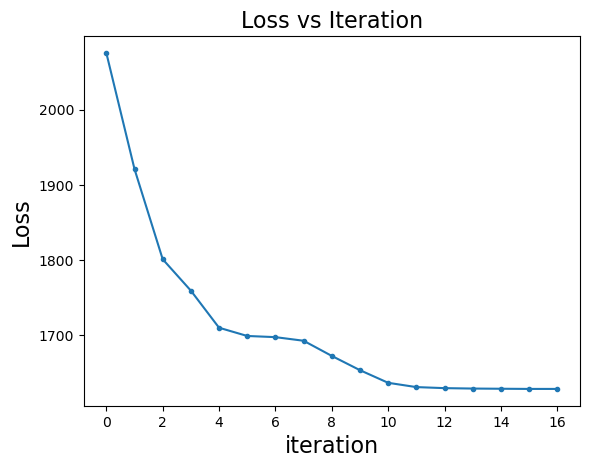

In [6]:
toc = time.time()
print('Elapsed time is %f seconds \n' % float(toc - tic))  
fig, ax = plt.subplots()
ax.plot(loss_list, '.-')
ax.set_title('Loss vs Iteration', fontsize=16)
ax.set_xlabel('iteration', fontsize=16)
ax.set_ylabel('Loss', fontsize=16)